In [9]:
from torch.utils.data import DataLoader

import pandas as pd

from dataset import HierarchicalImageDataset
from preprocess import encode_labels, split_data
from utils import compute_num_classes
from config import batch_size, train_transform, val_transform, num_epochs, lr

from model import train_model, evaluate_model, predict
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\charp\\Desktop\\Vinted\\data\\merged_results.csv')
df = df.dropna(subset=['path_downloaded_photo', 'id'])

always_include = ['id', 'path_downloaded_photo']
section_columns = [col for col in df.columns if col.endswith('section')]
columns_to_keep = always_include + section_columns

df = df[columns_to_keep]
df = df.iloc[:10_000]
df

C:\Users\charp\AppData\Local\Temp\ipykernel_12580\3286129225.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\charp\\Desktop\\Vinted\\data\\merged_results.csv')


,id,path_downloaded_photo,section,sub_section,sub_sub_section,sub_sub_sub_section,sub_sub_sub_sub_section
0,4802724290,../data\photos\Femmes\Vêtements\Lingerie et py...,Femmes,Vêtements,Lingerie et pyjamas,Peignoirs,NaN
1,4802719647,../data\photos\Femmes\Vêtements\Lingerie et py...,Femmes,Vêtements,Lingerie et pyjamas,Peignoirs,NaN
2,4802714924,../data\photos\Femmes\Vêtements\Lingerie et py...,Femmes,Vêtements,Lingerie et pyjamas,Peignoirs,NaN
3,4802710577,../data\photos\Femmes\Vêtements\Lingerie et py...,Femmes,Vêtements,Lingerie et pyjamas,Peignoirs,NaN
4,4802709553,../data\photos\Femmes\Vêtements\Lingerie et py...,Femmes,Vêtements,Lingerie et pyjamas,Peignoirs,NaN
...,...,...,...,...,...,...,...
9995,4801838754,../data\photos\Femmes\Vêtements\Hauts et t-shi...,Femmes,Vêtements,Hauts et t-shirts,Blouses,NaN
9996,4801838720,../data\photos\Femmes\Vêtements\Hauts et t-shi...,Femmes,Vêtements,Hauts et t-shirts,Blouses,NaN
9997,4801835762,../data\photos\Femmes\Vêtements\Hauts et t-shi...,Femmes,Vêtements,Hauts et t-shirts,Blouses,NaN
9998,4801838433,../data\photos\Femmes\Vêtements\Hauts et t-shi...,Femmes,Vêtements,Hauts et t-shirts,Blouses,NaN


In [3]:
df_new, section_categories = encode_labels(df)

In [4]:
df_new

,id,path_downloaded_photo,section_Femmes,sub_section_Vêtements,sub_sub_section_Hauts et t-shirts,sub_sub_section_Lingerie et pyjamas,sub_sub_sub_section_Blouses,sub_sub_sub_section_Peignoirs,sub_sub_sub_section_Tops courts,sub_sub_sub_section_Tops épaules dénudées,sub_sub_sub_sub_section_nan
0,4802724290,../data\photos\Femmes\Vêtements\Lingerie et py...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,4802719647,../data\photos\Femmes\Vêtements\Lingerie et py...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,4802714924,../data\photos\Femmes\Vêtements\Lingerie et py...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,4802710577,../data\photos\Femmes\Vêtements\Lingerie et py...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,4802709553,../data\photos\Femmes\Vêtements\Lingerie et py...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,4801838754,../data\photos\Femmes\Vêtements\Hauts et t-shi...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9996,4801838720,../data\photos\Femmes\Vêtements\Hauts et t-shi...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9997,4801835762,../data\photos\Femmes\Vêtements\Hauts et t-shi...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,4801838433,../data\photos\Femmes\Vêtements\Hauts et t-shi...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [5]:
section_categories

{'section': array(['Femmes'], dtype=object),
 'sub_section': array(['Vêtements'], dtype=object),
 'sub_sub_section': array(['Hauts et t-shirts', 'Lingerie et pyjamas'], dtype=object),
 'sub_sub_sub_section': array(['Blouses', 'Peignoirs', 'Tops courts', 'Tops épaules dénudées'],
       dtype=object),
 'sub_sub_sub_sub_section': array([nan], dtype=object)}

In [6]:
num_classes_dict = compute_num_classes(section_categories) 
num_classes_dict

{'section': 1,
 'sub_section': 1,
 'sub_sub_section': 2,
 'sub_sub_sub_section': 4,
 'sub_sub_sub_sub_section': 1}

In [7]:
train_df, val_df, test_df = split_data(df_new)

In [8]:
train_dataset = HierarchicalImageDataset(train_df, section_categories, transform=train_transform)
val_dataset = HierarchicalImageDataset(val_df, section_categories, transform=val_transform)
test_dataset = HierarchicalImageDataset(test_df, section_categories, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = train_model(train_loader, val_loader, num_classes_dict, num_epochs=1, lr=lr)

Epoch 1/1: 100%|██████████| 200/200 [01:35<00:00,  2.10batch/s]


Epoch 1/1, Train Loss: 0.9566, Validation Loss: 0.7230


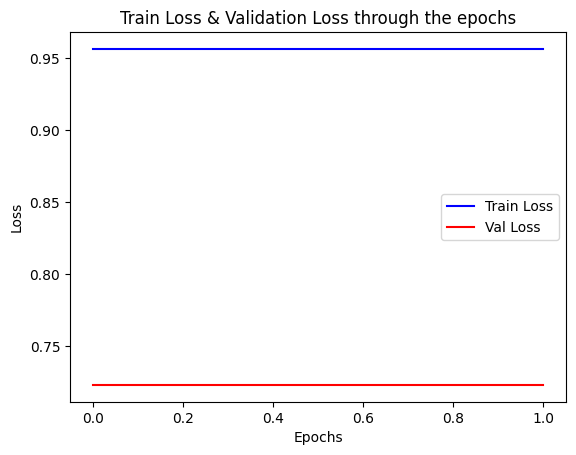

In [11]:
df_results = pd.read_csv('./training_results.csv')
plt.plot(df_results['Epoch'], df_results['Train Loss'], 'b-', label='Train Loss')
plt.plot(df_results['Epoch'], df_results['Validation Loss'], 'r-', label='Val Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss & Validation Loss through the epochs')

plt.legend()
plt.show()